# <center>Impermanent Loss: Math Derivation
Impermanent loss is a popular concept when it comes to Automated Market Makers (AMMs)
like Uniswap.
A liquidity provider puts an initial amount into two tokens and makes them available for traders
to trade with each other. Impermanent loss is the loss incurred when market prices change,
increasing the number of lower relative value tokens It is defined as the percentage difference
between the value of the new token composition versus the value if the initial composition
(hold) was maintained.
There are great articles that explain the concept well and provide examples, but they all show a
formula for Impermanent Loss (IL) without offering a derivation:<br>
<br>
$$
  IL = \frac{2\sqrt{d}}{d+1}-1\
$$

Let's see how to get it step by step:
 
##Considerations
Automated Market Maker protocols like Uniswap and SushiSwap are based on a very simple equation:

$$
x*y=K    \tag{1}
$$

Where, $x$ is the number of tokens for asset $X$, $y$ is the number of tokens for asset $Y$ and $K$ is
the constant product of the pool.<br> 
The value of the initial position is:
$$
V _0=x*p _x + y*p _y \tag{2}
$$
<br>
An equal value of both tokens is supplied to the pool, therefore:
<br> 
<br> 
$$
x*p _x = y*p _y 
$$
<br> 
\begin{align}
p_x&= \frac{y*p _y}{x}& p_y&= \frac{x*p _x}{y}  \tag{3}
\end{align}

From $(1)$ we know that $x = K/y $,  likewise $y = K/x$ ,<br> 
Substitute it in $(3)$:

<br>
$$
p_x = \frac{K/x}{x}*p _y \quad \quad  p_y= \frac{K/y}{y}*p _x 
$$
<br>
$$
p_x = \frac{K}{x^2}*p_y \quad \quad  p_y = \frac{K}{y^2}*p _x
$$
<br> 
    
We solve for $x$ and $y$ in terms of $K , p_x , p_y $ .
<br>
<br> 
$$
x^2= \frac{K}{p _x}*p _y  \quad \quad y^2 = \frac{K}{p_y}*p_x $$
<br>
$$ 
x= \sqrt{\frac{K}{p _x}*p _y} \quad \quad y= \sqrt{\frac{K}{p_y}*p_x} \tag{4}
$$
<br>
Then, we rewrite $V_0$ according to $(4)$:

$$
V_0 = \sqrt{\frac{K}{p _x}*p _y}*p _x + \sqrt{\frac{K}{p_y}*p_x}*p _y
$$

$$
V_0 = \sqrt{K*p _y*p _x} + \sqrt{K*p_x*p _y}
$$
<br>
$$
V_0 = 2\sqrt{K*p _y*p _x}
$$
<br>
What happens if prices change from $p_x$ to $p_{x1}$ and from $p_y$ to $p_{y1}$? <br>
The new quantities would be:
\begin{align}
x_1&= \sqrt{\frac{K}{p _{x1}}*p _{y1}}& y_1&= \sqrt{\frac{K}{p_{y1}}*p_{x1}} \tag{5}
\end{align}
<br>
We calculate the value with the new composition $x_1$ and $y_1$:

$$
V_1=x_1*p _{x1} + y_1*p _{y1} 
$$
<br>
$$
V_1 = \sqrt{\frac{K}{p _{x1}}*p _{y1}}*p _{x1} + \sqrt{\frac{K}{p_{y1}}*p_{x1}}*p _{y1}
$$
<br>
$$
V_1 = 2\sqrt{K*p _{y1}*p _{x1}} \tag{6}
$$
<br>
While holding does not change the quantities, $x$ and $y$ remain the same.<br>
Therefore, the value would be:

$$
Hold=x*p _{x1} + y*p _{y1} 
$$
<br>
$$
Hold = \sqrt{\frac{K}{p _{x}}*p _{y}}*p _{x1} + \sqrt{\frac{K}{p_{y}}*p_{x}}*p _{y1} \tag{7}
$$
<br>
To get the impermanent loss, we calculate the difference between $V_1$ and $Hold$.

$$
V_1 - Hold = 2\sqrt{K*p _{y1}*p _{x1}} - (\sqrt{\frac{K}{p _{x}}*p _{y}}*p _{x1} + \sqrt{\frac{K}{p_{y}}*p_{x}}*p _{y1} ) 
$$

We consider that $∆_x= p_{x1}/p_x$ and $∆_y= p_{y1}/p_y$<br>
So,  $p_{x1}= p_x*∆_x$  and  $p_{y1}= p_y*∆_y$ <br>
<br>
$$
V_1 - Hold = 2\sqrt{K*p_y*∆_y*p_x*∆_x} - (\sqrt{\frac{K}{p _{x}}*p _{y}}*p_x*∆_x + \sqrt{\frac{K}{p_{y}}*p_{x}}*p_y*∆_y ) 
$$
$$
V_1 - Hold = 2\sqrt{K*p_y*p_x*∆_y*∆_x} - (\sqrt{K*p _{y}*p_x}*∆_x + \sqrt{K*{p_{y}}*p_{x}*p_y}*∆_y ) 
$$
<br>
We calculate it as a percentage:

$$
\frac{V_1 - Hold}{Hold} = \frac{2\sqrt{K*p_y*p_x*∆_y*∆_x} - (\sqrt{K*p _{y}*p_x}*∆_x + \sqrt{K*{p_{y}}*p_{x}*p_y}*∆_y )}{\sqrt{K*p _{y}*p_x}*∆_x + \sqrt{K*{p_{y}}*p_{x}*p_y}*∆_y } 
$$
<br>
We factor $\sqrt{K*p_y*p_x}$ :

$$
\frac{V_1 - Hold}{Hold} = \frac{\sqrt{K*p_y*p_x}*(2\sqrt{∆_y*∆_x} - (∆_x + ∆_y ))}{\sqrt{K*p _{y}*p_x}*(∆_x + ∆_y )} 
$$

<br>
$$
\frac{V_1 - Hold}{Hold} =  \frac{2\sqrt{∆_y*∆_x}}{(∆_x + ∆_y )} -1  \tag{8}
$$

<br>
Consider that $d=∆_x/∆_y$, then $∆_x=d*∆_y$ :

$$
\frac{V_1 - Hold}{Hold} =  \frac{2\sqrt{∆_y^2*d}}{(d*∆_y + ∆_y )} -1
$$

<br>
We factor $∆_y$ :
$$
\frac{V_1 - Hold}{Hold} =  \frac{2*∆_y*\sqrt{d}}{∆_y*(d + 1 )} -1
$$
<br>
$$
\frac{V_1 - Hold}{Hold} =  \frac{2\sqrt{d}}{(d +1 )} - 1 \tag{9}
$$

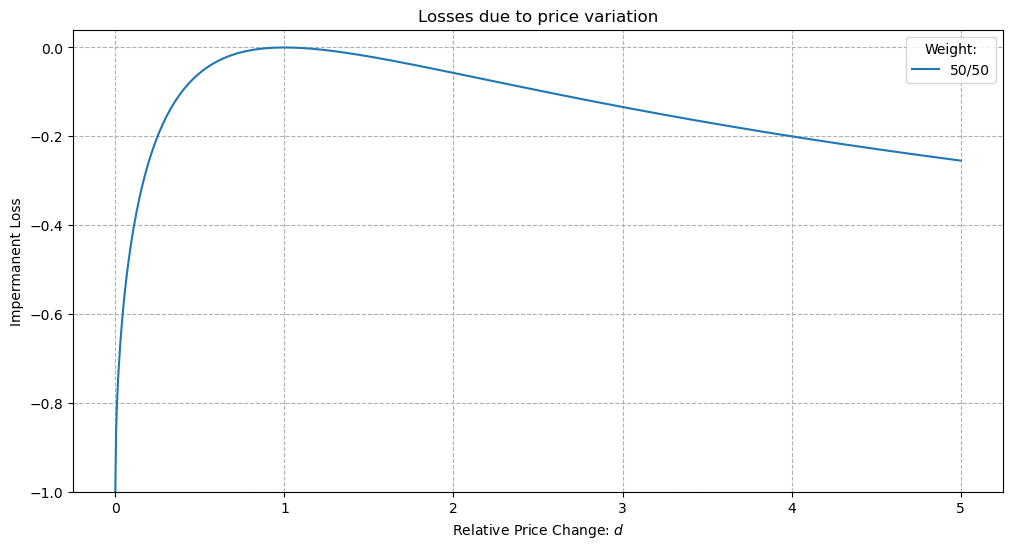

In [14]:
#@title
from IPython.display import HTML, display

display(HTML(""" <style>
#output-body { display: flex;  align-items: center; justify-content: center;}
</style> """))
import numpy as np
import matplotlib.pyplot as plt
d = np.linspace(0,5,1000)
plt.figure(figsize=(12, 6))
plt.plot(d,((d**0.5)*(1**0.5))/(0.5*d + 0.5*1)-1,label = "50/50")
plt.xlabel('Relative Price Change: $d$') 
plt.ylabel('Impermanent Loss') 
plt.title("Losses due to price variation")
plt.grid(linestyle='--')
plt.ylim(-1,0.04)
plt.legend(title="Weight:")
plt.show()



##Note 01: different weights <br>

In case the distribution of tokens is not 50/50, we will call $w_x$
for the weight of token $X$ and $w_y$ for the weight of token $Y$.<br>
We rewrite equation $(8)$:

$$
\frac{V_1 - Hold}{Hold} =  \frac{2\sqrt{∆_y*∆_x}}{(∆_x + ∆_y )} -1  
$$
<br>
$$
\frac{V_1 - Hold}{Hold} =  \frac{{∆_y^{0.5}*∆_x^{0.5}}}{(0.5*∆_x + 0.5*∆_y )} -1  
$$
<br>
$$
\frac{V_1 - Hold}{Hold} =  \frac{{∆_y^{w_x}*∆_x^{w_y}}}{(w_x*∆_x + w_y*∆_y )} -1  \tag{10}
$$

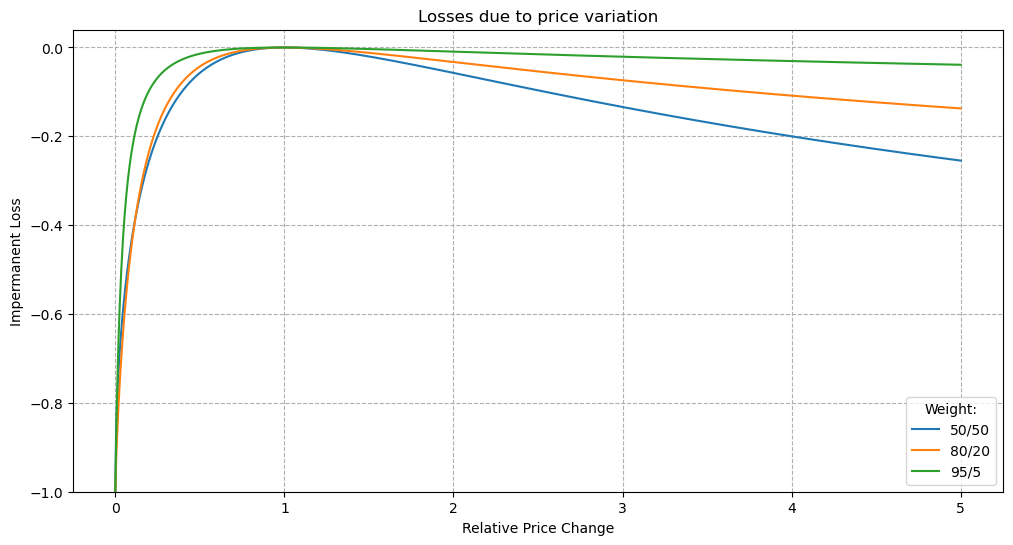

In [16]:
#@title

display(HTML(""" <style>
#output-body { display: flex;  align-items: center; justify-content: center;}
</style> """))

d = np.linspace(0,5,1000)
plt.figure(figsize=(12, 6))
plt.plot(d,((d**0.5)*(1**0.5))/(0.5*d + 0.5*1)-1,label = "50/50")
plt.plot(d,((d**0.8)*(1**0.2))/(0.8*d + 0.2*1)-1,label = "80/20")
plt.plot(d,((d**0.95)*(1**0.05))/(0.95*d + 0.05*1)-1,label = "95/5")
plt.xlabel('Relative Price Change') 
plt.ylabel('Impermanent Loss') 
plt.title("Losses due to price variation")
plt.ylim(-1,0.04)
plt.grid(linestyle='--')
plt.legend(title="Weight:")
plt.show()

##Note 02: variable number of assets<br>

Generalizing for more than two tokens:

$$
\frac{V_1 - Hold}{Hold} =  \frac{2\sqrt{∆_y*∆_x}}{(∆_x + ∆_y )} -1  
$$
<br>
$$
\frac{V_1 - Hold}{Hold} =  \frac{{∆_y^{0.5}*∆_x^{0.5}}}{(0.5*∆_x + 0.5*∆_y )} -1  
$$
<br>
$$
\frac{V_1 - Hold}{Hold} =  \frac{\prod_i(∆_i)^{w_i}}{\sum_i(w_i*∆_i)} -1  \tag{11}
$$

> Ed Fernández Grau [BLID](https://www.blid.one) <br>
Founder [Definomics Labs](https://www.definomicslabs.xyz) <br>
[Linkedin](https://www.linkedin.com/in/edwin-fernandez-grau/) | [Twitter](https://twitter.com/blid_one) |
[Lens](https://lenster.xyz/u/blidone.lens) <br>

---
